In [80]:
import pandas as pd
from datasets import load_dataset

import torch
from sentence_transformers import SentenceTransformer, models

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.spatial import Voronoi, voronoi_plot_2d

import umap.umap_ as umap

In [81]:
dataset = load_dataset("SetFit/toxic_conversations")
dataset = pd.DataFrame(dataset['test'])
dataset = dataset.dropna()
dataset = dataset[:500]

Repo card metadata block was not found. Setting CardData to empty.


In [82]:
model_name = "all-mpnet-base-v2"
word_embedding_model = models.Transformer(f"sentence-transformers/{model_name}")

# Aplica mean pooling para obter um vetor de sentença de tamanho fixo
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(),
                               pooling_mode_mean_tokens=True,
                               pooling_mode_cls_token=False,
                               pooling_mode_max_tokens=False)

model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

In [83]:
# Codificando os currículos em vetores reais (embeddings)
resume_embeddings = model.encode(dataset['text'].tolist(), convert_to_tensor=True)

# Calcula a distância euclidiana entre todos os pares de currículos
euclidean_distances = torch.pdist(resume_embeddings, p=2).cpu()

# Gera uma matriz de distâncias quadrada a partir dos resultados
euclidean_distances = squareform(euclidean_distances.numpy())

In [95]:
umap_reducer = umap.UMAP(n_neighbors=5, n_components=2, metric="precomputed", random_state=1)
pos = umap_reducer.fit_transform(euclidean_distances)
xs, ys = pos[:,0], pos[:,1]

/home/victor.henrique/.cache/pypoetry/virtualenvs/tp-final-5nA4dOpr-py3.11/lib/python3.11/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/victor.henrique/.cache/pypoetry/virtualenvs/tp-final-5nA4dOpr-py3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


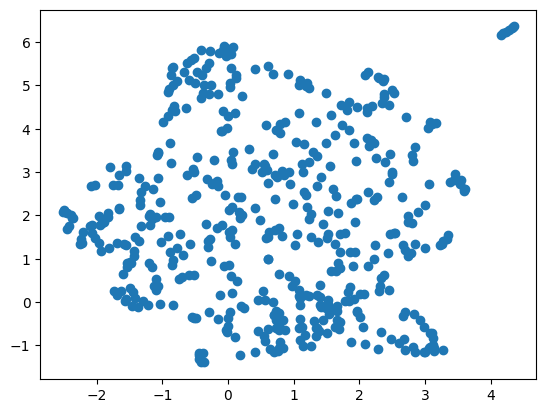

In [96]:
scatter = plt.scatter(xs, ys)

plt.show()